In [1]:
import pandas as pd
import numpy as np

In [2]:
df_l1= pd.read_csv('/kaggle/input/hindi-data/train_hi_l1.csv')
df_l1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0


In [ ]:
annotation_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  

In [ ]:
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)
df_l1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN,0.0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],

})

df = df.dropna(subset=['label_1'])
df['label_1'] = df['label_1'].astype(int)


print(df.head())
print(df.shape)

                                                text  label_1
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...        0
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...        0
2    सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...        0
3  !!हर शब्द अमॄतम!!  पुरानी एक कहावत है... टूटी ...        0
4  "PM मोदी जी " की माँ के लिए अपशब्द कहने वाला द...        1
(6196, 2)


In [6]:
df

,text,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1
...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,0
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,0
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",0


In [ ]:
import nltk
import string
import re

def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  
                              u"\U0001F300-\U0001F5FF"  
                              u"\U0001F680-\U0001F6FF"  
                              u"\U0001F700-\U0001F77F" 
                              u"\U0001F780-\U0001F7FF"  
                              u"\U0001F800-\U0001F8FF"  
                              u"\U0001F900-\U0001F9FF"  
                              u"\U0001FA00-\U0001FA6F"  
                              u"\U0001FA70-\U0001FAFF"  
                              u"\U00002702-\U000027B0"  
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text

In [8]:
df['text'] = df['text'].apply(lambda x: normalize_text(x))
df

,text,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,0
1,राजस्थान अजीबोगरीब गांव की खुशहाली के लिए ...,0
2,सलमान ने की राखी के विरोधी की वकालत तो आइटम...,0
3,हर शब्द अमॄतम पुरानी एक कहावत है टूटी ...,0
4,pm मोदी जी की माँ के लिए अपशब्द कहने वाला द...,1
...,...,...
6192,काम वाली बाई का फोन आया पत्नि को। कामवाली ...,0
6193,ग्रुप में चर्चा चल रही थी कि दिन के लॉक डाउन...,0
6194,school में हमें सती प्रथा घूंघट प्रथा ...,0
6195,लंका का जिहादी डॉक्टर हजारों हिंदू महिलाओं क...,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import matplotlib.pyplot as plt

X_texts = list(df['text'])
y = df['label_1'].values


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-04-13 12:26:55.082738: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744547215.332391      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744547215.407908      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:

max_features = 10000
max_len = 100
embed_size = 300

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_texts)
X_sequences = tokenizer.texts_to_sequences(X_texts)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')
X_padded = np.array(X_padded)

y_cat = np.eye(2)[y]
y_cat
X_padded

array([[  63,    5,  896, ...,    0,    0,    0],
       [ 629, 8331, 1047, ...,    0,    0,    0],
       [1783,   21,    3, ...,    0,    0,    0],
       ...,
       [   5,  357, 4739, ...,    0,    0,    0],
       [7806,    6,  201, ...,    0,    0,    0],
       [ 205,  205, 8227, ...,    0,    0,    0]], dtype=int32)

In [12]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.hi.300.vec.gz
!gunzip cc.hi.300.vec.gz


--2025-04-13 12:27:21--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.hi.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.239.50.9, 18.239.50.18, 18.239.50.104, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.239.50.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1118942272 (1.0G) [binary/octet-stream]
Saving to: ‘cc.hi.300.vec.gz’

cc.hi.300.vec.gz    100%[===================>]   1.04G   266MB/s    in 4.1s    

2025-04-13 12:27:25 (261 MB/s) - ‘cc.hi.300.vec.gz’ saved [1118942272/1118942272]



# # Load GloVe
embeddings_index = {}
with open('/kaggle/working/cc.hi.300.vec', encoding="utf8") as f:    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs



vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)


# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
for word, i in tokenizer.word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


# Dataset
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.LongTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTMClassifier, self).__init__()
        vocab_size, embed_size = embedding_matrix.shape
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.dropout1 = nn.Dropout(0.2)
        self.conv1 = nn.Conv1d(embed_size, 64, kernel_size=2)
        self.lstm = nn.LSTM(64, 128, batch_first=True, bidirectional=True)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.out = nn.Linear(128, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout1(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = x.permute(0, 2, 1)
        x = self.avgpool(x).squeeze(2)
        x = torch.relu(self.fc(x))
        x = self.dropout2(x)
        return self.out(x)

# Training and Evaluation
kf = KFold(n_splits=2, shuffle=True, random_state=42)
precision_list, recall_list, f1_list = [], [], []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_padded)):
    print(f"\nFold {fold+1}")
    train_dataset = TextDataset(X_padded[train_idx], y_cat[train_idx])
    val_dataset = TextDataset(X_padded[val_idx], y_cat[val_idx])
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    model = LSTMClassifier(embedding_matrix).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.005)
    criterion = nn.CrossEntropyLoss()

    train_acc_hist, val_acc_hist, train_loss_hist, val_loss_hist = [], [], [], []
    best_val_f1 = 0.0
    best_model_path = f"model{fold+1}.pt"

     
    for epoch in range(20):
        model.train()
        total_loss, correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = torch.argmax(outputs, axis=1)
            correct += (preds == torch.argmax(labels, dim=1)).sum().item()

        train_acc = correct / len(train_loader.dataset)
        train_acc_hist.append(train_acc)
        train_loss_hist.append(total_loss / len(train_loader))

        model.eval()
        val_loss, correct = 0, 0
        y_preds, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                val_loss += loss.item()
                preds = torch.argmax(outputs, axis=1)
                correct += (preds == torch.argmax(labels, dim=1)).sum().item()
                y_preds.extend(preds.cpu().numpy())
                y_true.extend(torch.argmax(labels, axis=1).cpu().numpy())

        val_acc = correct / len(val_loader.dataset)
        val_acc_hist.append(val_acc)
        val_loss_hist.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
        

    # Metrics
    report = classification_report(y_true, y_preds, target_names=['Hate', 'Not Hate'], output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    val_f1 = report['weighted avg']['f1-score']

    
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), best_model_path)
    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_true, y_preds, target_names=["Hate", "Not Hate"])}\n')

    # Plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_hist, label="Train Accuracy")
    plt.plot(val_acc_hist, label="Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_hist, label="Train Loss")
    plt.plot(val_loss_hist, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Final Results
print("\nAverage Results Across 2 Folds:")
print(f"Precision: {np.mean(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.2f}")



Fold 1
Epoch 1 - Train Acc: 0.7101, Val Acc: 0.7189
Epoch 2 - Train Acc: 0.7095, Val Acc: 0.7221
Epoch 3 - Train Acc: 0.7140, Val Acc: 0.7189
Epoch 4 - Train Acc: 0.7117, Val Acc: 0.7205
Epoch 5 - Train Acc: 0.7082, Val Acc: 0.7237
Epoch 6 - Train Acc: 0.7208, Val Acc: 0.7360
Epoch 7 - Train Acc: 0.7379, Val Acc: 0.7376
Epoch 8 - Train Acc: 0.7372, Val Acc: 0.7372
Epoch 9 - Train Acc: 0.7337, Val Acc: 0.7289
Epoch 10 - Train Acc: 0.7434, Val Acc: 0.7402
Epoch 11 - Train Acc: 0.7476, Val Acc: 0.7324
Epoch 12 - Train Acc: 0.7492, Val Acc: 0.7392
Epoch 13 - Train Acc: 0.7560, Val Acc: 0.7398
Epoch 14 - Train Acc: 0.7534, Val Acc: 0.7440
Epoch 15 - Train Acc: 0.7531, Val Acc: 0.7424
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.76      0.94      0.84      2227
    Not Hate       0.61      0.24      0.34       871

    accuracy                           0.74      3098
   macro avg       0.68      0.59      0.59      3098
weighte

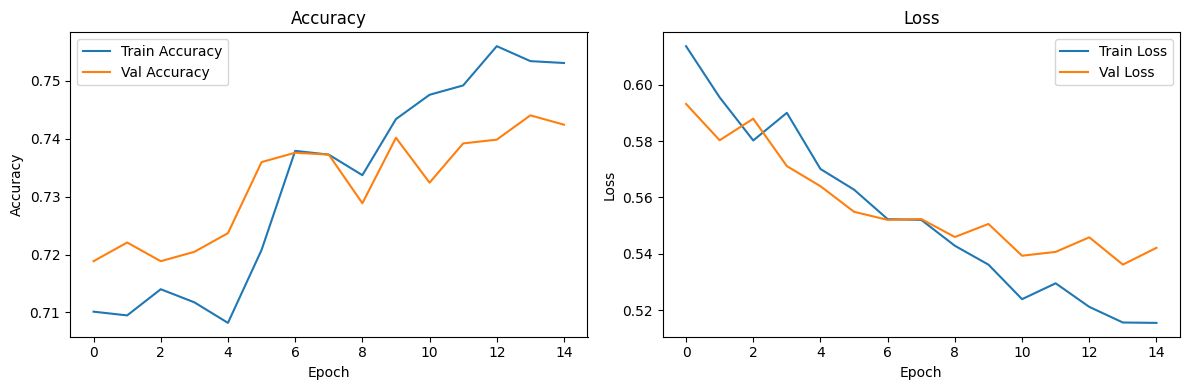


Fold 2
Epoch 1 - Train Acc: 0.7072, Val Acc: 0.7101
Epoch 2 - Train Acc: 0.7143, Val Acc: 0.7137
Epoch 3 - Train Acc: 0.7176, Val Acc: 0.7101
Epoch 4 - Train Acc: 0.7189, Val Acc: 0.7101
Epoch 5 - Train Acc: 0.7185, Val Acc: 0.7108
Epoch 6 - Train Acc: 0.7182, Val Acc: 0.7134
Epoch 7 - Train Acc: 0.7201, Val Acc: 0.7169
Epoch 8 - Train Acc: 0.7276, Val Acc: 0.7059
Epoch 9 - Train Acc: 0.7230, Val Acc: 0.7163
Epoch 10 - Train Acc: 0.7311, Val Acc: 0.7159
Epoch 11 - Train Acc: 0.7279, Val Acc: 0.7198
Epoch 12 - Train Acc: 0.7334, Val Acc: 0.6982
Epoch 13 - Train Acc: 0.7324, Val Acc: 0.7218
Epoch 14 - Train Acc: 0.7431, Val Acc: 0.7169
Epoch 15 - Train Acc: 0.7453, Val Acc: 0.7234
Fold 2 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.75      0.93      0.83      2200
    Not Hate       0.56      0.23      0.32       898

    accuracy                           0.72      3098
   macro avg       0.65      0.58      0.58      3098
weighte

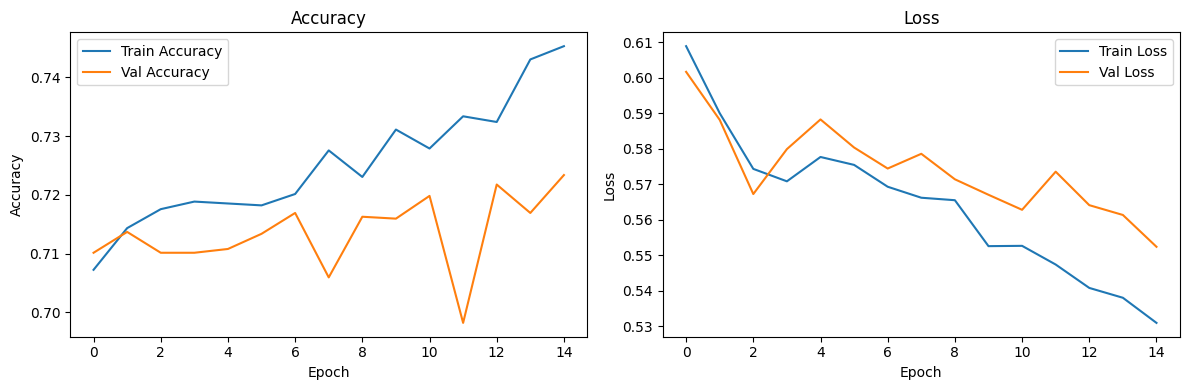


Average Results Across 2 Folds:
Precision: 0.70
Recall: 0.73
F1 Score: 0.69


In [ ]:

embeddings_index = {}
with open('/kaggle/working/cc.hi.300.vec', encoding="utf8") as f:    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs



vocab_size = len(tokenizer.word_index) + 1  
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)


embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
for word, i in tokenizer.word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.LongTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix):
        super(LSTMClassifier, self).__init__()
        vocab_size, embed_size = embedding_matrix.shape
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.dropout1 = nn.Dropout(0.2)
        self.conv1 = nn.Conv1d(embed_size, 64, kernel_size=2)
        self.lstm = nn.LSTM(64, 128, batch_first=True, bidirectional=True)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.out = nn.Linear(128, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout1(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = x.permute(0, 2, 1)
        x = self.avgpool(x).squeeze(2)
        x = torch.relu(self.fc(x))
        x = self.dropout2(x)
        return self.out(x)

kf = KFold(n_splits=2, shuffle=True, random_state=42)
precision_list, recall_list, f1_list = [], [], []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_padded)):
    print(f"\nFold {fold+1}")
    train_dataset = TextDataset(X_padded[train_idx], y_cat[train_idx])
    val_dataset = TextDataset(X_padded[val_idx], y_cat[val_idx])
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    model = LSTMClassifier(embedding_matrix).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.0005)
    criterion = nn.CrossEntropyLoss()

    train_acc_hist, val_acc_hist, train_loss_hist, val_loss_hist = [], [], [], []
    best_val_f1 = 0.0
    best_model_path = f"model{fold+1}.pt"

     
    for epoch in range(15):
        model.train()
        total_loss, correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = torch.argmax(outputs, axis=1)
            correct += (preds == torch.argmax(labels, dim=1)).sum().item()

        train_acc = correct / len(train_loader.dataset)
        train_acc_hist.append(train_acc)
        train_loss_hist.append(total_loss / len(train_loader))

        model.eval()
        val_loss, correct = 0, 0
        y_preds, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                val_loss += loss.item()
                preds = torch.argmax(outputs, axis=1)
                correct += (preds == torch.argmax(labels, dim=1)).sum().item()
                y_preds.extend(preds.cpu().numpy())
                y_true.extend(torch.argmax(labels, axis=1).cpu().numpy())

        val_acc = correct / len(val_loader.dataset)
        val_acc_hist.append(val_acc)
        val_loss_hist.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
        

    
    report = classification_report(y_true, y_preds, target_names=['Hate', 'Not Hate'], output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    val_f1 = report['weighted avg']['f1-score']

    
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), best_model_path)
    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_true, y_preds, target_names=["Hate", "Not Hate"])}\n')

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_hist, label="Train Accuracy")
    plt.plot(val_acc_hist, label="Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_hist, label="Train Loss")
    plt.plot(val_loss_hist, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Final Results
print("\nAverage Results Across 2 Folds:")
print(f"Precision: {np.mean(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.2f}")


In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score


f1 = f1_score(y_true, y_preds, average='weighted')
precision = precision_score(y_true, y_preds, average='weighted')
recall = recall_score(y_true, y_preds, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)


F1 Score: 0.6807237940912482
Precision: 0.6908814673474131
Recall: 0.723369916074887
{'Hate': {'precision': 0.7462412907957462, 'recall': 0.925, 'f1-score': 0.8260604830525674, 'support': 2200}, 'Not Hate': {'precision': 0.555256064690027, 'recall': 0.22939866369710468, 'f1-score': 0.3246650906225374, 'support': 898}, 'accuracy': 0.723369916074887, 'macro avg': {'precision': 0.6507486777428866, 'recall': 0.5771993318485523, 'f1-score': 0.5753627868375524, 'support': 3098}, 'weighted avg': {'precision': 0.6908814673474131, 'recall': 0.723369916074887, 'f1-score': 0.6807237940912482, 'support': 3098}}


In [15]:
vv = pd.read_csv('/kaggle/input/hindi-data/test_hi_l1.csv', on_bad_lines='skip', engine='python')


In [16]:
import string
def normalize_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text
## Apply the written function ##
vv['text'] = vv['text'].apply(lambda x: normalize_text(x))
processed_list = []
for j in vv['text']:
    process = j.replace('...','')
    processed_list.append(process)

vv = pd.DataFrame(processed_list)
vv.columns = ['text']
vv.head(n=5)


,text
0,bandrastation sharadpawar muradabad अगर अभ...
1,conspiracyagainstindia सुन लो रे देश के गद्द...
2,marathareservation महाराष्ट्र में जश्न का म...
3,rheachakraborty aap mahesh bhatt se madad kiy...
4,secularmaskofd हमे पता नहि क्या कहते है इतना...


In [ ]:
model = LSTMClassifier(embedding_matrix).to(device)
model.load_state_dict(torch.load('/kaggle/working/model2.pt', map_location=device))
model.eval()

sequence = tokenizer.texts_to_sequences(vv['text'])  
sequence = pad_sequences(sequence, padding='post', maxlen=max_len)
input_tensor = torch.tensor(sequence).long().to(device)

with torch.no_grad():
    outputs = model(input_tensor)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()

ids = np.arange(1, len(predictions) + 1)
result_df = pd.DataFrame({'id': ids, 'value': predictions})
result_df.to_csv('/kaggle/working/Task1_output_hindi.csv', index=False)

print(result_df.head())

   id  value
0   1      0
1   2      1
2   3      0
3   4      0
4   5      0


/tmp/ipykernel_31/514219607.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/model2.pt', map_location=device))


In [18]:
result_df

,id,value
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
1512,1513,0
1513,1514,0
1514,1515,0
1515,1516,0


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

# Load and compute label_1
true_df = pd.read_csv('/kaggle/input/hindi-data/test_hi_l1.csv', on_bad_lines='skip', engine='python')

annotation_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue
    if not valid_votes:
        return None
    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)
    return 1 if ones >= zeros else 0

=true_df['label_1'] = true_df[annotation_cols].apply(get_majority_label, axis=1)

true_df = true_df.dropna(subset=['label_1']).reset_index(drop=True)
true_labels = true_df['label_1'].astype(int).values

predictions = predictions[:len(true_labels)]

f1 = f1_score(true_labels, predictions, average='weighted')
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)

print("\nEvaluation on Test Set:")
print(f"F1 Score:      {f1:.4f}")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"Accuracy:      {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Hate", "Not Hate"]))


🔍 Evaluation on Test Set:
F1 Score:      0.7244
Precision:     0.7209
Recall:        0.7612
Accuracy:      0.7612

Classification Report:
              precision    recall  f1-score   support

        Hate       0.79      0.93      0.86      1158
    Not Hate       0.49      0.22      0.30       358

    accuracy                           0.76      1516
   macro avg       0.64      0.57      0.58      1516
weighted avg       0.72      0.76      0.72      1516

